# **Perspective Transforms**

**In this lesson we'll learn:**
1. Use OpenCV's getPerspectiveTransform
2. Use findContours to get corners and automate perspective Transform


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image, title="", size=10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    


Number of Contours found = 6


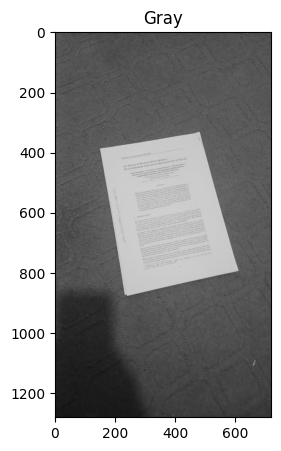

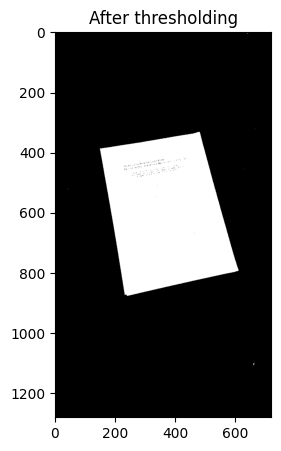

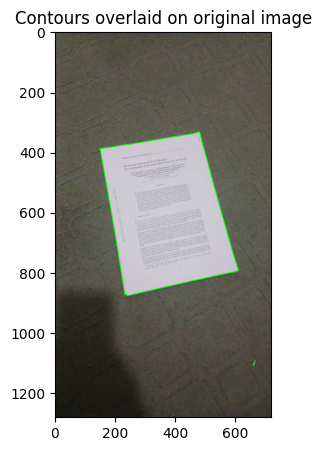

In [94]:
image= cv2.imread('images/paper.jpg')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray, 'Gray', 5)

ret, thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))

In [95]:
ret

138.0

In [96]:
gray.shape

(1280, 720)

In [97]:
len(contours), contours[0]

(6,
 array([[[ 660, 1100]],
 
        [[ 659, 1101]],
 
        [[ 659, 1102]],
 
        [[ 658, 1103]],
 
        [[ 658, 1107]],
 
        [[ 659, 1106]],
 
        [[ 659, 1105]],
 
        [[ 660, 1104]],
 
        [[ 660, 1102]],
 
        [[ 661, 1101]]], dtype=int32))

In [98]:
hierarchy.shape, hierarchy[0][0]

((1, 6, 4), array([ 1, -1, -1, -1], dtype=int32))

### **Approxiamte our contour above to just 4 points using approxPolyDP**

In [114]:
# Sort contours large to small by area
sorted_contours= sorted(contours, key=cv2.contourArea, reverse=True)

for contour in sorted_contours:
    # approximate the contour
    perimeter= cv2.arcLength(contour, True)
    approx= cv2.approxPolyDP(contour, 0.05 * perimeter, True)
    
    if len(approx)==4:
        break
        
# Our x, y cordinates of the four corners 
print("Our 4 corner points are:\n", approx)

    

Our 4 corner points are:
 [[[479 332]]

 [[149 387]]

 [[231 873]]

 [[608 793]]]


In [115]:
len(sorted_contours), sorted_contours[0].shape, sorted_contours[0]

(6,
 (706, 1, 2),
 array([[[475, 332]],
 
        [[474, 333]],
 
        [[471, 333]],
 
        ...,
 
        [[480, 335]],
 
        [[480, 333]],
 
        [[479, 332]]], dtype=int32))

In [116]:
cv2.arcLength(sorted_contours[0], False), cv2.arcLength(sorted_contours[0], True)

(1797.803165435791, 1801.803165435791)

In [117]:
cv2.arcLength(contours[0], False), cv2.arcLength(contours[0], True)

(15.071067690849304, 16.485281229019165)

In [118]:
perimeter, approx, len(approx)

(1801.803165435791,
 array([[[479, 332]],
 
        [[149, 387]],
 
        [[231, 873]],
 
        [[608, 793]]], dtype=int32),
 4)

### **Use getPerspectiveTransform and warpPerspective to create our top down view**

Note: We mannauly matched the order of the points

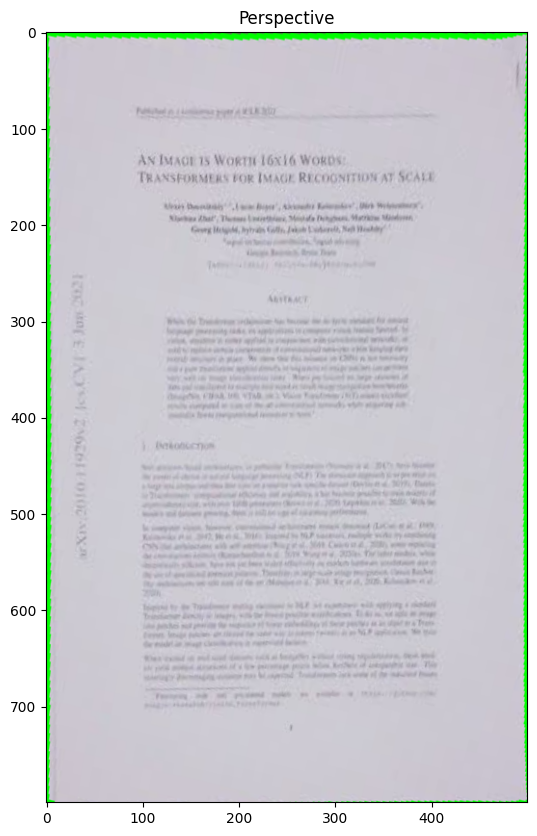

In [125]:
# Order obtained here is top right, top left, bottom left, bottom right
input_points= np.float32(approx)

output_points = np.float32([[500,0],
                           [0,0],
                           [0,800],
                           [500,800]])

# Get our Transform Matrix, M
M= cv2.getPerspectiveTransform(input_points, output_points)

# Apply the transform Matrix M using Warp Perspective
dst= cv2.warpPerspective(image, M, (500,800))

imshow(dst, 'Perspective')

In [131]:
type(approx), approx.dtype

(numpy.ndarray, dtype('int32'))

In [132]:
type(input_points), input_points.dtype

(numpy.ndarray, dtype('float32'))

In [133]:
M

array([[ 1.62743165e+00, -2.74587233e-01, -1.36222057e+02],
       [ 3.51231066e-01,  2.10738640e+00, -8.67891965e+02],
       [-4.07906166e-05,  3.73036716e-04,  1.00000000e+00]])

In [134]:
image.shape, dst.shape

((1280, 720, 3), (800, 500, 3))

In [135]:
contours

(array([[[ 660, 1100]],
 
        [[ 659, 1101]],
 
        [[ 659, 1102]],
 
        [[ 658, 1103]],
 
        [[ 658, 1107]],
 
        [[ 659, 1106]],
 
        [[ 659, 1105]],
 
        [[ 660, 1104]],
 
        [[ 660, 1102]],
 
        [[ 661, 1101]]], dtype=int32),
 array([[[ 43, 521]],
 
        [[ 44, 521]]], dtype=int32),
 array([[[624, 455]]], dtype=int32),
 array([[[475, 332]],
 
        [[474, 333]],
 
        [[471, 333]],
 
        ...,
 
        [[480, 335]],
 
        [[480, 333]],
 
        [[479, 332]]], dtype=int32),
 array([[[666, 320]]], dtype=int32),
 array([[[640,   1]],
 
        [[638,   3]],
 
        [[638,   4]],
 
        [[639,   4]],
 
        [[640,   3]]], dtype=int32))